In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.isnull().values.any()

False

In [22]:
df.shape

(284807, 31)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
corr=df.corr()[:-1]
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


In [7]:
df.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In [8]:
df.kurtosis()

Time       -1.293530
V1         32.486679
V2         95.773106
V3         26.619551
V4          2.635455
V5        206.904560
V6         42.642494
V7        405.607417
V8        220.586974
V9          3.731311
V10        31.988239
V11         1.633921
V12        20.241870
V13         0.195300
V14        23.879462
V15         0.284769
V16        10.419131
V17        94.799719
V18         2.578341
V19         1.724970
V20       271.016113
V21       207.287040
V22         2.832967
V23       440.088659
V24         0.618871
V25         4.290412
V26         0.919006
V27       244.989241
V28       933.397502
Amount    845.092646
Class     573.887843
dtype: float64

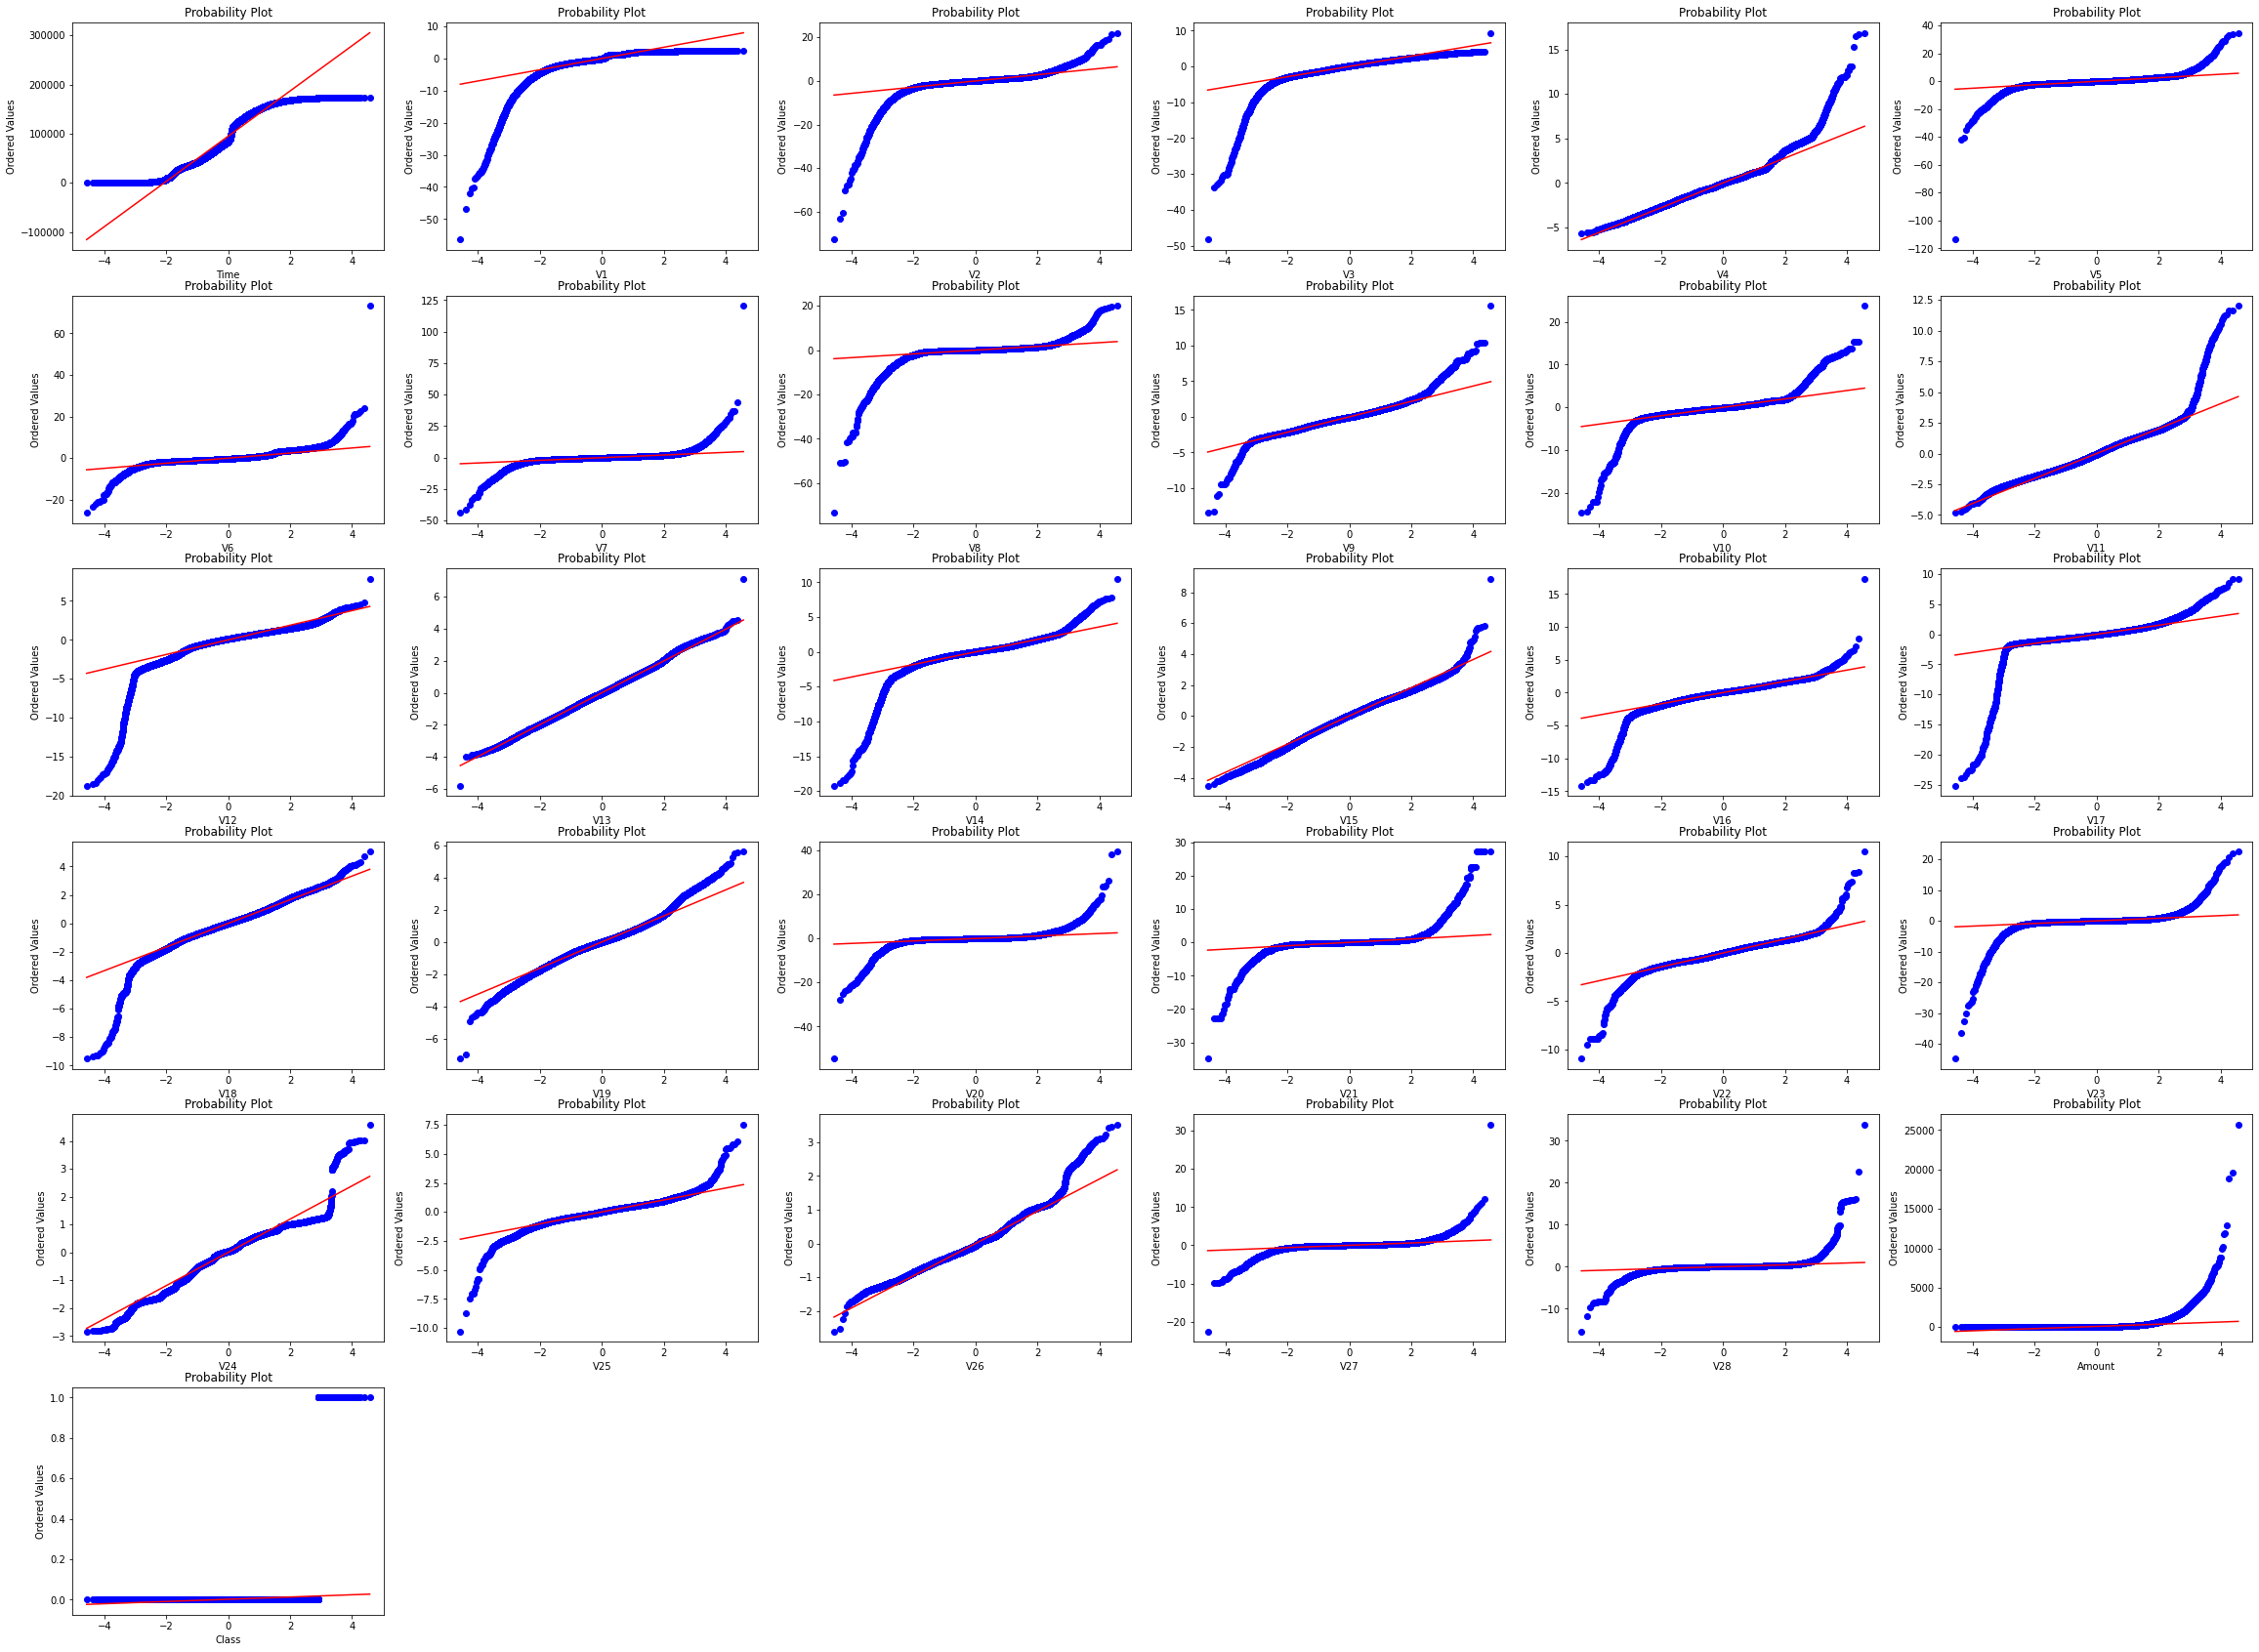

In [9]:
#ploting q-q plot to see the distribution of the dataset
from scipy import stats
plt.figure(figsize=(40,30))
j=1
for i in df.columns:
    if j<= len(df.columns):
        plt.subplot(6,6,j)
        stats.probplot(df[i],plot=plt)
        plt.xlabel(i,fontsize=10)
    j+=1
plt.show()

In [40]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [41]:
#predicting the anamolies output using the anamoly detection technique
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [53]:
from sklearn.metrics import accuracy_score,classification_report
import scikitplot as splt
model=IsolationForest(contamination=0.0017)
pred=model.fit_predict(X)
pred[pred== 1] =0
pred[pred== -1] =1
print(accuracy_score(y,pred))
print(classification_report(y,pred))

0.9974333496016601
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.25      0.25      0.25       492

    accuracy                           1.00    284807
   macro avg       0.63      0.62      0.63    284807
weighted avg       1.00      1.00      1.00    284807



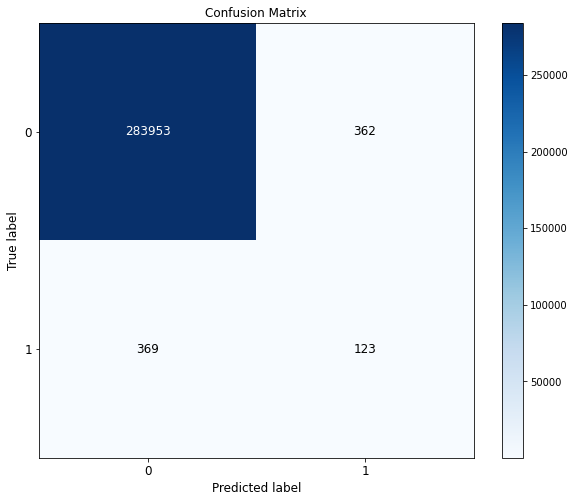

In [70]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
splt.metrics.plot_confusion_matrix(y,pred,text_fontsize="large",figsize=(10,8))
plt.show()

In [83]:
#printing the comparison result between actual value and predicted values
Result=pd.DataFrame({"Actual":y,"Predicted":pred})
Result.tail(20)

,Actual,Predicted
284787,0,0
284788,0,0
284789,0,0
284790,0,0
284791,0,0
284792,0,0
284793,0,0
284794,0,0
284795,0,0
284796,0,0


c:\programdata\anaconda3\envs\project2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


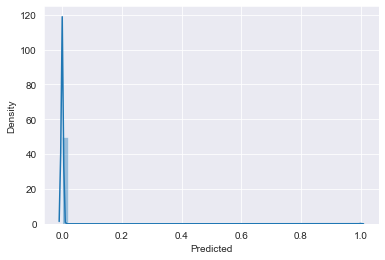

In [86]:
sns.set_style("darkgrid")
sns.distplot(Result["Predicted"])
plt.show()

In [93]:
#predicting the result using input user input
model.predict([[ 1.        ,  1.19185711,  0.26615071,  0.16648011,  0.44815408,\
        0.06001765, -0.08236081, -0.07880298,  0.08510165, -0.25542513,\
       -0.16697441,  1.61272666,  1.06523531,  0.48909502, -0.1437723 ,\
        0.63555809,  0.46391704, -0.11480466, -0.18336127, -0.14578304,\
       -0.06908314, -0.22577525, -0.63867195,  0.10128802, -0.33984648,\
        0.1671704 ,  0.12589453, -0.0089831 ,  0.01472417,  149       ]])

array([1])

## Using Local Outlier Factor

In [98]:
from sklearn.metrics import accuracy_score,classification_report
import scikitplot as splt
model=OneClassSVM(nu=0.005)
pred=model.fit_predict(X)
pred[pred== 1] =0
pred[pred== -1] =1
print(accuracy_score(y,pred))
print(classification_report(y,pred))

0.9932937041575524
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           0.99    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      0.99      0.99    284807



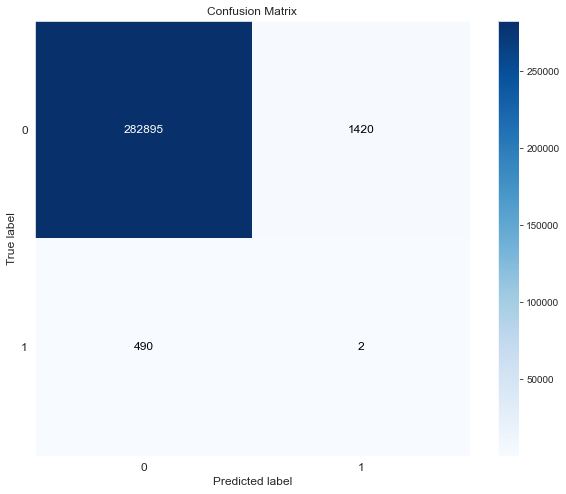

In [99]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
splt.metrics.plot_confusion_matrix(y,pred,text_fontsize="large",figsize=(10,8))
plt.show()

In [ ]:
#printing the comparison result between actual value and predicted values
Result=pd.DataFrame({"Actual":y,"Predicted":pred})
Result.tail(20)

In [ ]:
sns.set_style("darkgrid")
sns.distplot(Result["Predicted"])
plt.show()